In [1]:
from Graph.graph import app
from IPython.display import Image, display

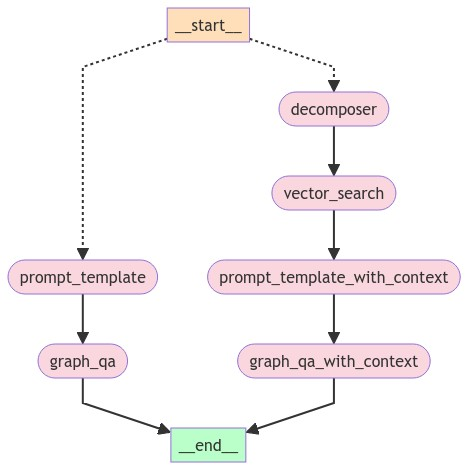

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
graph_qa_result = app.invoke({"question": "find top 5 cited articles and return their title"})

---ROUTE QUESTION---
---ROUTE QUESTION TO GRAPH QA---


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a:Article) WITH a ORDER BY a.citation_count DESC RETURN a.title LIMIT 5

> Finished chain.


In [6]:
graph_qa_result['documents']

{'query': 'find top 5 cited articles and return their title',
 'result': [{'a.title': 'Humic Acids Isolated from Earthworm Compost Enhance Root Elongation, Lateral Root Emergence, and Plasma Membrane H+-ATPase Activity in Maize Roots'},
  {'a.title': 'Rapid Estimates of Relative Water Content'},
  {'a.title': 'ARAMEMNON, a Novel Database for Arabidopsis Integral Membrane Proteins'},
  {'a.title': 'Polyamines in plant physiology.'},
  {'a.title': 'Microarray Analysis of the Nitrate Response in Arabidopsis Roots and Shoots Reveals over 1,000 Rapidly Responding Genes and New Linkages to Glucose, Trehalose-6-Phosphate, Iron, and Sulfate Metabolism '}]}

In [7]:
result = app.invoke({"question": "find articles about oxidative stress. Return the title of the most relevant article"})

---ROUTE QUESTION---
---ROUTE QUESTION TO VECTOR SEARCH---


> Entering new RetrievalQA chain...

> Finished chain.


In [8]:
result.keys()

dict_keys(['question', 'documents', 'article_ids', 'prompt_with_context', 'subqueries'])

In [9]:
result['documents']

{'query': 'Return the title of the most relevant article.',
 'result': [{'a.title': 'Molecular Responses to Abscisic Acid and Stress Are Conserved between Moss and Cereals'}]}

In [10]:
result['subqueries']

[SubQuery(sub_query='Find articles related to oxidative stress.'),
 SubQuery(sub_query='Return the title of the most relevant article.')]